In [1]:
#Copyright (c) 2007–2018 The scikit-learn developers.
#All rights reserved.
#Modified by:
#David Bueds

# imports
# numerical tools
import numpy as np
import pandas as pd

# plotting tools
import matplotlib.pyplot as plt
import seaborn as sns
import graphviz

# machine learning tools
import sklearn
import pandas_ml as pdml

# notebook initialisation
%matplotlib inline

In [2]:
#uitlezen van csv in dataframe mbv pandas, 
#splitsen op ;, gebruik 0e rij als kolomnaam
df = pd.read_csv('data/thesis.csv',sep=';', header=0)

In [3]:
#tonen van het ingeladen dataframe (default 5 rijen)
df.head()

,main,banden,typeEvent,toespoor,camber,bandendruk,hoogte,totaalTijd
0,Rain,C17 wet,SkidPad,1003.0,-0.2,0.7,20.0,6.79
1,Rain,C17 wet,SkidPad,1004.0,-0.8,0.7,28.0,6.58
2,Rain,C17 wet,Acceleratie,1005.0,-0.9,0.8,38.0,3.35
3,Clear,C17 slick,SkidPad,1003.0,-0.7,0.7,37.0,6.24
4,Rain,C17 wet,Acceleratie,995.0,-0.5,0.7,21.0,3.26


### Preprocessing

In [4]:
# Label encoding:
#1) C17 slick / C17 wet --> 1 / 2
df['banden'][df['banden'] == 'C17 slick'] = 1
df['banden'][df['banden'] == 'C17 wet'] = 2
#4) Acceleratie / SkidPad --> 1 / 2
df['typeEvent'][df['typeEvent'] == 'Acceleratie'] = 1
df['typeEvent'][df['typeEvent'] == 'SkidPad'] = 2
#5) Clear / Rain --> 1 / 2
df['main'][df['main'] == 'Clear'] = 1
df['main'][df['main'] == 'Rain'] = 2



df = df.infer_objects()
df.head(400)

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/local/lib/python3.7/site-packages/ip

,main,banden,typeEvent,toespoor,camber,bandendruk,hoogte,totaalTijd
0,2.0,2.0,2.0,1003.0,-0.2,0.7,20.0,6.79
1,2.0,2.0,2.0,1004.0,-0.8,0.7,28.0,6.58
2,2.0,2.0,1.0,1005.0,-0.9,0.8,38.0,3.35
3,1.0,1.0,2.0,1003.0,-0.7,0.7,37.0,6.24
4,2.0,2.0,1.0,995.0,-0.5,0.7,21.0,3.26
5,2.0,2.0,2.0,1002.0,-0.5,0.7,34.0,6.44
6,2.0,2.0,2.0,996.0,-0.8,0.7,27.0,6.70
7,2.0,2.0,1.0,1003.0,-0.9,0.6,37.0,3.15
8,2.0,2.0,2.0,996.0,-0.7,0.6,38.0,6.05
9,1.0,1.0,1.0,1000.0,-0.3,0.7,29.0,2.67


### Afhandelen van missende waardes

In [5]:
df = df.dropna()

### Scaling

In [6]:
df.toespoor_orig = df['toespoor'].copy()
df.hoogte_orig = df['hoogte'].copy()

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  


Herschalen van toespoor en hoogte, zodat maxwaarden onder x komen. We gebruiken onderstaande formule voor normalisatie met zelfgekozen maxwaarde C:
\begin{equation*}
\mathbf{z} = \frac{\mathbf{x} - \min(\mathbf{x})}{\max(\mathbf{x}) - \min(\mathbf{x})} * C
\end{equation*}

In [7]:
C = 10
#df['toespoor'] = (df['toespoor'] - df['toespoor'].min())/(df['toespoor'].max() - df['toespoor'].min())*C
#df['hoogte'] = (df['hoogte'] - df['hoogte'].min())/(df['hoogte'].max() - df['hoogte'].min())*C
df.head()

,main,banden,typeEvent,toespoor,camber,bandendruk,hoogte,totaalTijd
0,2.0,2.0,2.0,1003.0,-0.2,0.7,20.0,6.79
1,2.0,2.0,2.0,1004.0,-0.8,0.7,28.0,6.58
2,2.0,2.0,1.0,1005.0,-0.9,0.8,38.0,3.35
3,1.0,1.0,2.0,1003.0,-0.7,0.7,37.0,6.24
4,2.0,2.0,1.0,995.0,-0.5,0.7,21.0,3.26


### Werken met Pandas-ML

In [8]:
df_car = pdml.ModelFrame(df.copy(), target='totaalTijd')
df_car['toespoor'] = df.toespoor_orig    ## herstel toespoor
df_car['hoogte'] = df.hoogte_orig    ## herstel toespoor
df_car.head() #terug oorspronkelijke dataset

,main,banden,typeEvent,toespoor,camber,bandendruk,hoogte,totaalTijd
0,2.0,2.0,2.0,1003.0,-0.2,0.7,20.0,6.79
1,2.0,2.0,2.0,1004.0,-0.8,0.7,28.0,6.58
2,2.0,2.0,1.0,1005.0,-0.9,0.8,38.0,3.35
3,1.0,1.0,2.0,1003.0,-0.7,0.7,37.0,6.24
4,2.0,2.0,1.0,995.0,-0.5,0.7,21.0,3.26


In [9]:
df_car.describe()   #toon alle statistieken van data

,main,banden,typeEvent,toespoor,camber,bandendruk,hoogte,totaalTijd
count,1000.00000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,1.49000,1.49000,1.528000,1000.137000,-0.509500,0.702900,29.936000,4.737980
std,0.50015,0.50015,0.499465,3.161364,0.288969,0.071461,6.126617,1.656857
min,1.00000,1.00000,1.000000,995.000000,-1.000000,0.600000,20.000000,2.270000
25%,1.00000,1.00000,1.000000,997.000000,-0.800000,0.700000,24.000000,3.070000
50%,1.00000,1.00000,2.000000,1000.000000,-0.500000,0.700000,30.000000,5.690000
75%,2.00000,2.00000,2.000000,1003.000000,-0.300000,0.800000,35.000000,6.312500
max,2.00000,2.00000,2.000000,1005.000000,0.000000,0.800000,40.000000,7.150000


### Visualtisatie dataset

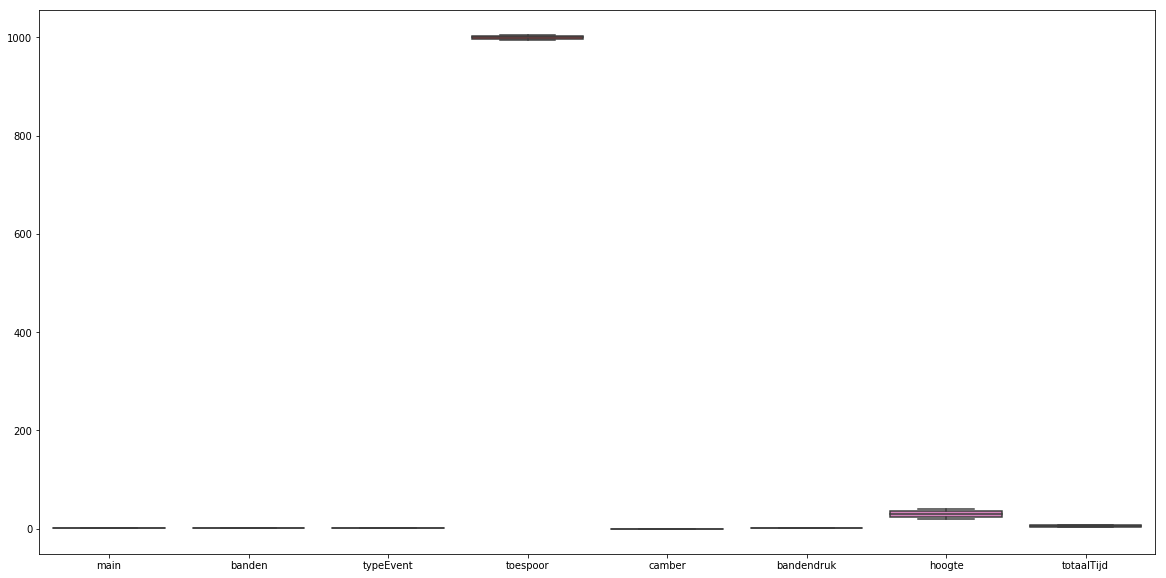

In [10]:
#boxplot die spreiding van data weergeeft van alle feature kolommen
fig, ax = plt.subplots(figsize=(20, 10))
sns.boxplot(data=df, ax=ax)

### Scatter plot

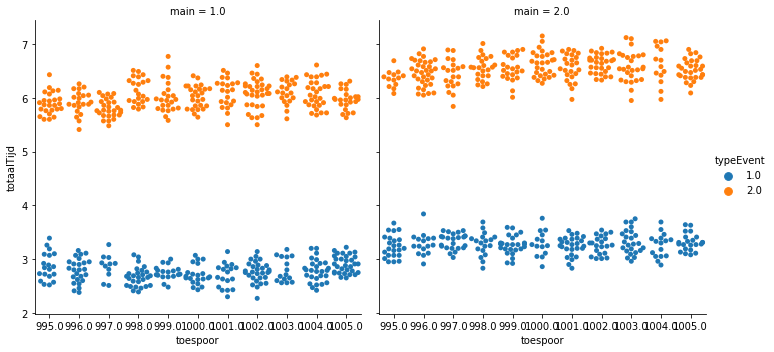

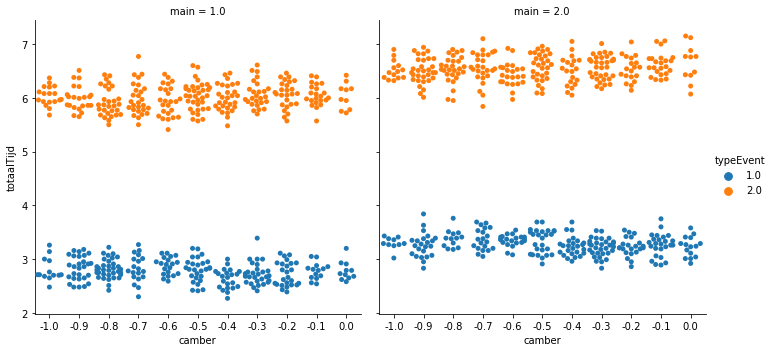

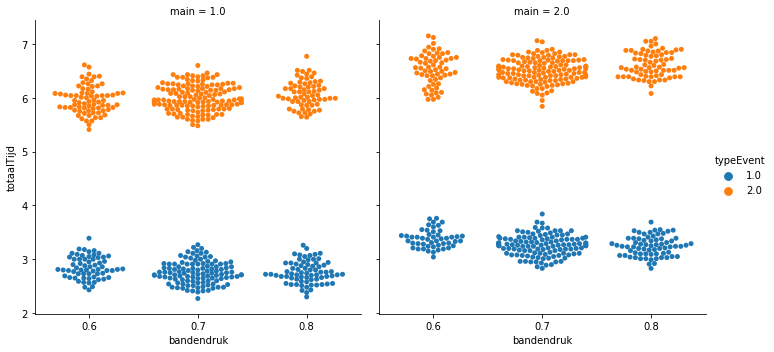

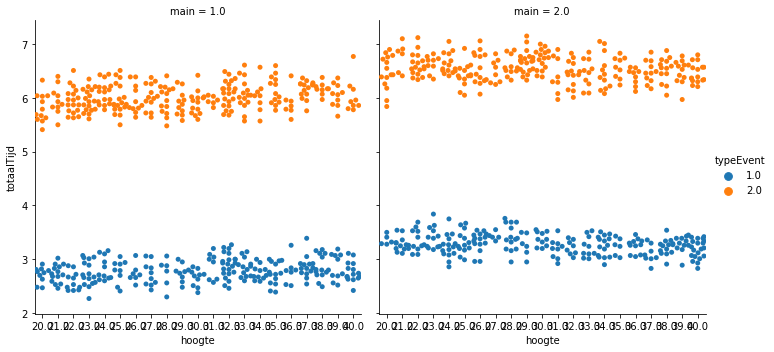

In [11]:
#Het verband tussen type event, toespoor, weer en totaaltijd
sns.catplot(x="toespoor", y="totaalTijd", hue="typeEvent", col="main",kind="swarm", data=df_car);
#Het verband tussen type event, camber, weer en totaaltijd
sns.catplot(x="camber", y="totaalTijd", hue="typeEvent", col="main",kind="swarm", data=df_car);
#Het verband tussen type event, bandendruk, weer en totaaltijd
sns.catplot(x="bandendruk", y="totaalTijd", hue="typeEvent", col="main",kind="swarm", data=df_car);
#Het verband tussen type event, hoogte, weer en totaaltijd
sns.catplot(x="hoogte", y="totaalTijd", hue="typeEvent", col="main",kind="swarm", data=df_car);


### Machine Learning

In [12]:
#principle component analyse zou de boom kunnen vereenvoudigen, maar na test blijkt dat 
#deze vereenvoudiging geen grote invloed heeft.
#pca = df_car.decomposition.PCA()  ## import and instantiation
#df_car_transformed = df_car.fit_transform(pca) ## fit and transform the data

#df_car_transformed.head()                       ## results are in DataFrame format

### Train-Test Split

In [13]:
# create training and testing vars
X = df.drop('totaalTijd', axis=1)
y = df['totaalTijd']  
train_car, test_car = df_car.model_selection.train_test_split(train_size=0.7, test_size=0.3)
#print(X)

from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=0)  

### Regressie boom

In [14]:
#from sklearn import tree
reg_tree = train_car.tree.DecisionTreeRegressor()
train_car.fit(reg_tree)

names = list(df_car.columns.values[:7])
print(names)

['main', 'banden', 'typeEvent', 'toespoor', 'camber', 'bandendruk', 'hoogte']


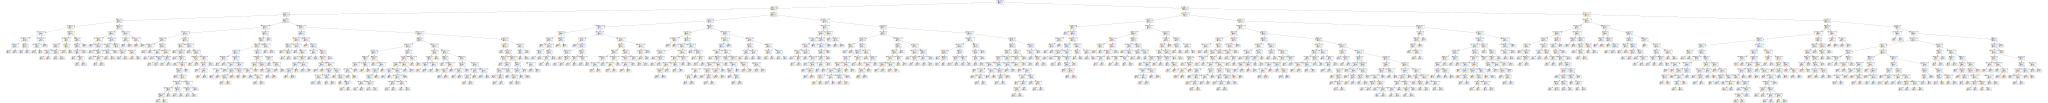

In [15]:
# teken
from sklearn import tree
with open("boom.dot", "w") as f:
    f=train_car.tree.export_graphviz(reg_tree, out_file=f, feature_names=df_car.columns.values[:7])
tree_fig=train_car.tree.export_graphviz(reg_tree, out_file=None, feature_names=df_car.columns.values[:7])
graph=graphviz.Source(tree_fig)
graph

In [16]:
#y_pred = reg_tree.predict(test_car[:7])
y_pred = reg_tree.predict(X_test)  

In [17]:
df=pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})  
#df

In [18]:
from sklearn import metrics 
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred)*100)  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred)*100)  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred))*100)
#beste score is 100
print('R2 score: ', metrics.r2_score(y_test, y_pred)*100)
print('Explained Variance Score:', metrics.explained_variance_score(y_test, y_pred)*100)

Mean Absolute Error: 6.484999999999999
Mean Squared Error: 2.0285416666666665
Root Mean Squared Error: 14.242688182596245
R2 score:  99.28095383657524
Explained Variance Score: 99.29422578787644


Text(0.5,1,'Predicted vs actual values, totaalTijd is target')

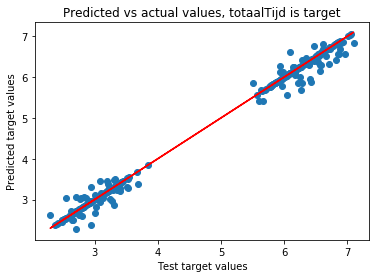

In [19]:
fig, ax = plt.subplots()
ax.scatter(y_test, y_pred)
ax.plot(y_test, y_test, color='red')
ax.set_xlabel('Test target values')
ax.set_ylabel('Predicted target values')
ax.set_title('Predicted vs actual values, totaalTijd is target')

### Maken van voorspellingen

In [20]:
from collections import OrderedDict
new_data = OrderedDict([
    ('main', 2.0),
    ('banden', 2.0),
    ('typeEvent', 2.0),
    ('toespoor', 1004.0),
    ('camber', -0.80),
    ('bandendruk', 0.70),
    ('hoogte', 28.0)]
)
new_data = pd.Series(new_data).values.reshape(1,-1)
d = reg_tree.predict(new_data)
print('Voor de gegeven input features is de voorspelde tijd: ', d[0])

Voor de gegeven input features is de voorspelde tijd:  6.3


### Model opslaan met Pickle

In [21]:
import pickle

with open('reg_tree.pkl', 'wb') as fid:
    pickle.dump(reg_tree, fid,2)
    
cat = df_car.drop('totaalTijd',axis=1)
index_dict = dict(zip(cat.columns,range(cat.shape[1])))

#Save the index_dict into disk
with open('cat', 'wb') as fid:
    pickle.dump(index_dict, fid,2)

### Support Vector Regressor

In [22]:
from sklearn import svm
reg_svm = train_car.svm.SVR()
train_car.fit(reg_svm)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

### Multilayer perceptron

In [23]:
from sklearn.neural_network import MLPRegressor
reg_mlp = MLPRegressor(hidden_layer_sizes=(20,15,10,5), solver="lbfgs", max_iter=20000)
train_car.fit(reg_mlp)

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(20, 15, 10, 5), learning_rate='constant',
       learning_rate_init=0.001, max_iter=20000, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='lbfgs', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [24]:
aantal_weights = 0
for i in range (0,len(reg_mlp.coefs_)):
    aantal_weights += len(reg_mlp.coefs_[i])
    print("layer",i,"heeft",len(reg_mlp.coefs_[i]),"weights")
print("totaal aantal weights",aantal_weights)

layer 0 heeft 7 weights
layer 1 heeft 20 weights
layer 2 heeft 15 weights
layer 3 heeft 10 weights
layer 4 heeft 5 weights
totaal aantal weights 57


### Cross validatie

In [25]:
# ShuffleSplit
from sklearn.model_selection import ShuffleSplit
cv = train_car.model_selection.ShuffleSplit(n_splits=10, test_size=0.3)

In [27]:
# cross validation score
#data.values
from sklearn.model_selection import cross_val_score
tree_score = train_car.model_selection.cross_val_score(reg_tree,cv=cv)
svm_score = train_car.model_selection.cross_val_score(reg_svm,cv=cv)
mlp_score = train_car.model_selection.cross_val_score(reg_mlp,cv=cv)

print("gem. tree_score",sum(tree_score)/len(tree_score)*100)
print("gem. svm_score",sum(svm_score)/len(svm_score)*100)
print("gem. mlp_score",sum(mlp_score)/len(mlp_score)*100)

#print("SVM haalt de hoogst score met",sum(svm_score)/len(svm_score))

gem. tree_score 96.73459793041118
gem. svm_score 90.32032025805216
gem. mlp_score 68.36065298531302
